## Импорт библиотек, загрузка данных и общий просмотр

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np
import warnings
warnings.simplefilter("ignore")
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# просмотр, где находится каталог с файлами на COLAB
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# получить доступ к каталогу и уточнить названия папок
import os
os.listdir('/content/drive/My Drive/Colab Notebooks/Яндекс/Проект 5 Предложить пользователям новый тариф: «Смарт» или «Ультра»')

['users_behavior.csv', 'Предложить тариф.ipynb', 'GitHub']

In [ ]:
# присвоить переменной путь к файлу в каталоге
path = "/content/drive/My Drive/Colab Notebooks/Яндекс/Проект 5 Предложить пользователям новый тариф: «Смарт» или «Ультра»/users_behavior.csv"

In [ ]:
# считать данные csv и присвоить им имя
df = pd.read_csv(path)

In [ ]:
# просмотр типов данных и кол-ва ненулевых значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [ ]:
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


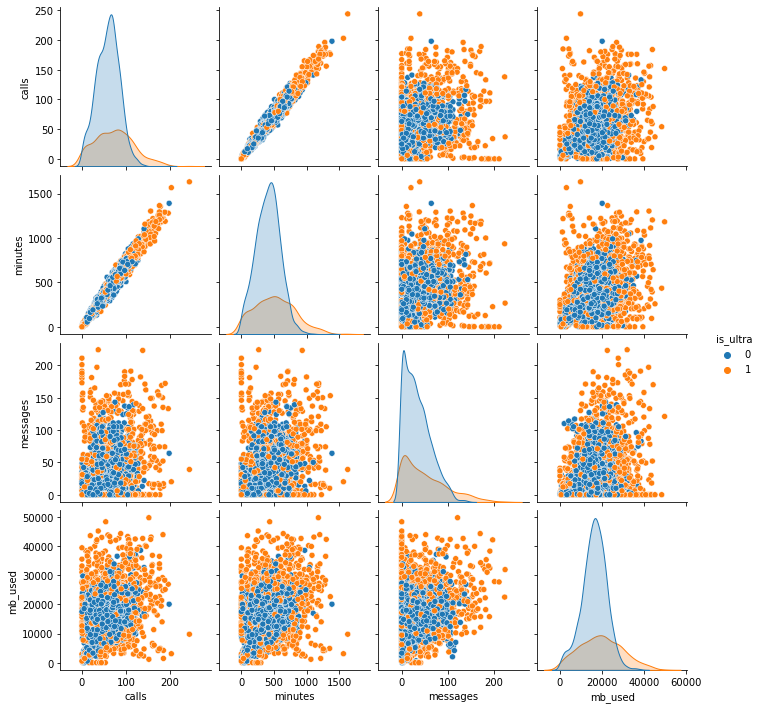

In [ ]:
# изучение корреляции в данных
sns.pairplot(df, hue="is_ultra");

### Подготовка данных к исследованию

In [ ]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

In [ ]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=12345)

In [ ]:
features_train.shape

(1928, 4)

In [ ]:
features_valid_test.shape

(1286, 4)

In [ ]:
target_train.shape

(1928,)

In [ ]:
target_valid_test.shape

(1286,)

In [ ]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

In [ ]:
features_valid.shape

(643, 4)

In [ ]:
target_valid.shape

(643,)

In [ ]:
features_test.shape

(643, 4)

In [ ]:
target_test.shape

(643,)

### Решающее дерево - DecisionTreeClassifier

In [ ]:
best_model_DecisionTreeClassifier = None
best_result = 0
for depth in range(1, 6):
	model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
	model.fit(features_train, target_train)
	predictions_valid = model.predict(features_valid)
	result = accuracy_score(target_valid, predictions_valid)
	if result > best_result:
		best_model_DecisionTreeClassifier = model
		best_result = result
        
print("Accuracy лучшей модели на валидационной выборке:", round(best_result, 3))

Accuracy лучшей модели на валидационной выборке: 0.785


In [ ]:
best_model_DecisionTreeClassifier

DecisionTreeClassifier(max_depth=3, random_state=12345)

### Решающий лес - RandomForestClassifier

In [ ]:
best_model_RandomForestClassifier = None
best_result = 0
for est in range(1, 11):
  for depth in range(1, 6):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
    model.fit(features_train, target_train) 
    result = model.score(features_valid, target_valid) 
    if result > best_result:
        best_model_RandomForestClassifier = model
        best_result = result 

print("Accuracy наилучшей модели на валидационной выборке:", round(best_result, 3))

Accuracy наилучшей модели на валидационной выборке: 0.793


In [ ]:
best_model_RandomForestClassifier

RandomForestClassifier(max_depth=5, n_estimators=8, random_state=12345)

### Логистическая регрессия - LogisticRegression

In [ ]:
list_solver = ['saga', 'lbfgs', 'liblinear', 'sag', 'newton-cg']
best_model_LogisticRegression = None
best_result = 0
for sol in list_solver:
  model = LogisticRegression(random_state=12345, solver=sol, max_iter=1000)
  model.fit(features_train, target_train)
  valid_predictions = model.predict(features_valid)
  result = accuracy_score(target_valid, valid_predictions)
  if best_result < result:
    best_result = result
    best_model_LogisticRegression = model

In [ ]:
print("Accuracy наилучшей модели на валидационной выборке:", round(best_result, 3))

Accuracy наилучшей модели на валидационной выборке: 0.759


In [ ]:
best_model_LogisticRegression

LogisticRegression(max_iter=1000, random_state=12345, solver='liblinear')

### Проверка качества модели на тестовой выборке

In [ ]:
list_model = [best_model_DecisionTreeClassifier, best_model_RandomForestClassifier, best_model_LogisticRegression]

In [ ]:
list_model

[DecisionTreeClassifier(max_depth=3, random_state=12345),
 RandomForestClassifier(max_depth=5, n_estimators=8, random_state=12345),
 LogisticRegression(max_iter=1000, random_state=12345, solver='liblinear')]

In [ ]:
best_model = None
best_result = 0
for mod in list_model:
  test_predictions = mod.predict(features_test)
  result = accuracy_score(target_test, test_predictions)
  if best_result < result:
    best_result = result
    best_model = mod

print("Лучшая модель:", best_model)
print("Accuracy наилучшей модели на тестовой выборке:", round(best_result, 3))

Лучшая модель: RandomForestClassifier(max_depth=5, n_estimators=8, random_state=12345)
Accuracy наилучшей модели на тестовой выборке: 0.796


## Вывод

**В результате моделирования, установлено:**
1. Accuracy модели DecisionTreeClassifier(max_depth=3, random_state=12345) на валидационной выборке: 0.785
2. Accuracy модели RandomForestClassifier(max_depth=5, n_estimators=8, random_state=12345) на валидационной выборке: 0.793
3. Accuracy модели LogisticRegression(max_iter=1000, random_state=12345, solver='liblinear') на валидационной выборке: 0.759
4. Лучшая модель: RandomForestClassifier(max_depth=5, n_estimators=8, random_state=12345). Accuracy наилучшей модели на тестовой выборке: 0.796